<a href="https://colab.research.google.com/github/ashkanb77/Activity-Recognition/blob/main/Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00506/casas-dataset.zip

--2022-02-19 09:28:20--  http://archive.ics.uci.edu/ml/machine-learning-databases/00506/casas-dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13952153033 (13G) [application/x-httpd-php]
Saving to: ‘casas-dataset.zip’

casas-dataset.zip   100%[===================>]  12.99G  22.6MB/s    in 9m 54s  

2022-02-19 09:38:14 (22.4 MB/s) - ‘casas-dataset.zip’ saved [13952153033/13952153033]



In [ ]:
import os
import shutil
from tqdm import tqdm

In [ ]:
zip_address = 'casas-dataset.zip'
extracted_address = 'drive/MyDrive/casas-dataset-extracted'
unzip_command = '7z e {0} -o{1} {2} -x!{2}/{2}.rawdata.*'
rm_command = 'rm -r {0}'

try:
    os.mkdir(extracted_address)
except:
    shutil.rmtree(extracted_address)
    os.mkdir(extracted_address)

os.system(f'7z e {zip_address} -o{extracted_address} README.txt')
for i in tqdm(range(101, 131)):
    os.system(unzip_command.format(zip_address, f'{extracted_address}/csh{i}', f'csh{i}'))
    os.rmdir(f'{extracted_address}/csh{i}/csh{i}')

100%|██████████| 30/30 [01:29<00:00,  2.99s/it]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('drive/MyDrive/casas-dataset-extracted/csh111/csh111.ann.features.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset.head()

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,complexity,activityChange,areaTransitions,numDistinctSensors,sensorCount-Bathroom,sensorCount-Bedroom,sensorCount-Chair,sensorCount-DiningRoom,sensorCount-Hall,sensorCount-Ignore,sensorCount-Kitchen,sensorCount-LivingRoom,sensorCount-Office,sensorCount-OutsideDoor,sensorCount-WorkArea,sensorElTime-Bathroom,sensorElTime-Bedroom,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea,activity
0,0.0,1258.0,2.0,698.0,1.0,0.0,0.0,1.0,1.0,1.0,0.650022,0.028653,0.0,0.0,0.0,28.62,0.0,0.0,0.0,5.73,0.0,0.0,0.0,0.0,0.0,86400.0,0.0,86400.0,86400.0,86400.0,1.571419,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
1,0.0,1260.0,2.0,699.0,2.0,0.0,0.0,1.0,1.0,1.0,0.650022,0.028612,0.0,0.0,0.0,28.57,0.0,0.0,0.0,5.78,0.0,0.0,0.0,0.0,0.0,86400.0,0.0,86400.0,86400.0,86400.0,2.852767,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
2,0.0,1282.0,2.0,720.0,22.0,0.0,0.0,1.0,1.0,1.0,0.650022,0.029167,0.0,0.0,0.0,28.52,0.0,0.0,0.0,5.83,0.0,0.0,0.0,0.0,0.0,86400.0,0.0,86400.0,86400.0,86400.0,25.571251,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
3,0.0,1283.0,2.0,719.0,1.0,0.0,0.0,1.0,1.0,1.0,0.650022,0.027816,0.0,0.0,0.0,28.47,0.0,0.0,0.0,5.88,0.0,0.0,0.0,0.0,0.0,86400.0,0.0,86400.0,86400.0,86400.0,26.665044,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
4,0.0,1329.0,2.0,756.0,46.0,0.0,0.0,1.0,1.0,1.0,0.650022,0.017196,0.0,0.0,0.0,28.42,0.0,0.0,0.0,5.93,0.0,0.0,0.0,0.0,0.0,86400.0,0.0,86400.0,86400.0,86400.0,72.605688,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep


In [ ]:
len(dataset['activity'].unique())

35

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351324 entries, 0 to 351323
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   lastSensorEventHours      351324 non-null  float64
 1   lastSensorEventSeconds    351324 non-null  float64
 2   lastSensorDayOfWeek       351324 non-null  float64
 3   windowDuration            351324 non-null  float64
 4   timeSinceLastSensorEvent  351324 non-null  float64
 5   prevDominantSensor1       351324 non-null  float64
 6   prevDominantSensor2       351324 non-null  float64
 7   lastSensorID              351324 non-null  float64
 8   lastSensorLocation        351324 non-null  float64
 9   lastMotionLocation        351324 non-null  float64
 10  complexity                351324 non-null  float64
 11  activityChange            351324 non-null  float64
 12  areaTransitions           351324 non-null  float64
 13  numDistinctSensors        351324 non-null  f

In [ ]:
dataset.isna().sum()

lastSensorEventHours        0
lastSensorEventSeconds      0
lastSensorDayOfWeek         0
windowDuration              0
timeSinceLastSensorEvent    0
prevDominantSensor1         0
prevDominantSensor2         0
lastSensorID                0
lastSensorLocation          0
lastMotionLocation          0
complexity                  0
activityChange              0
areaTransitions             0
numDistinctSensors          0
sensorCount-Bathroom        0
sensorCount-Bedroom         0
sensorCount-Chair           0
sensorCount-DiningRoom      0
sensorCount-Hall            0
sensorCount-Ignore          0
sensorCount-Kitchen         0
sensorCount-LivingRoom      0
sensorCount-Office          0
sensorCount-OutsideDoor     0
sensorCount-WorkArea        0
sensorElTime-Bathroom       0
sensorElTime-Bedroom        0
sensorElTime-Chair          0
sensorElTime-DiningRoom     0
sensorElTime-Hall           0
sensorElTime-Ignore         0
sensorElTime-Kitchen        0
sensorElTime-LivingRoom     0
sensorElTi

In [ ]:
dataset.isnull().sum()

lastSensorEventHours        0
lastSensorEventSeconds      0
lastSensorDayOfWeek         0
windowDuration              0
timeSinceLastSensorEvent    0
prevDominantSensor1         0
prevDominantSensor2         0
lastSensorID                0
lastSensorLocation          0
lastMotionLocation          0
complexity                  0
activityChange              0
areaTransitions             0
numDistinctSensors          0
sensorCount-Bathroom        0
sensorCount-Bedroom         0
sensorCount-Chair           0
sensorCount-DiningRoom      0
sensorCount-Hall            0
sensorCount-Ignore          0
sensorCount-Kitchen         0
sensorCount-LivingRoom      0
sensorCount-Office          0
sensorCount-OutsideDoor     0
sensorCount-WorkArea        0
sensorElTime-Bathroom       0
sensorElTime-Bedroom        0
sensorElTime-Chair          0
sensorElTime-DiningRoom     0
sensorElTime-Hall           0
sensorElTime-Ignore         0
sensorElTime-Kitchen        0
sensorElTime-LivingRoom     0
sensorElTi

In [ ]:
skb = SelectKBest(k=12)
dataset_values = skb.fit_transform(dataset.drop(['activity'], axis=1).values, dataset['activity'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [13 16 17 18 22 27 28 29 33] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


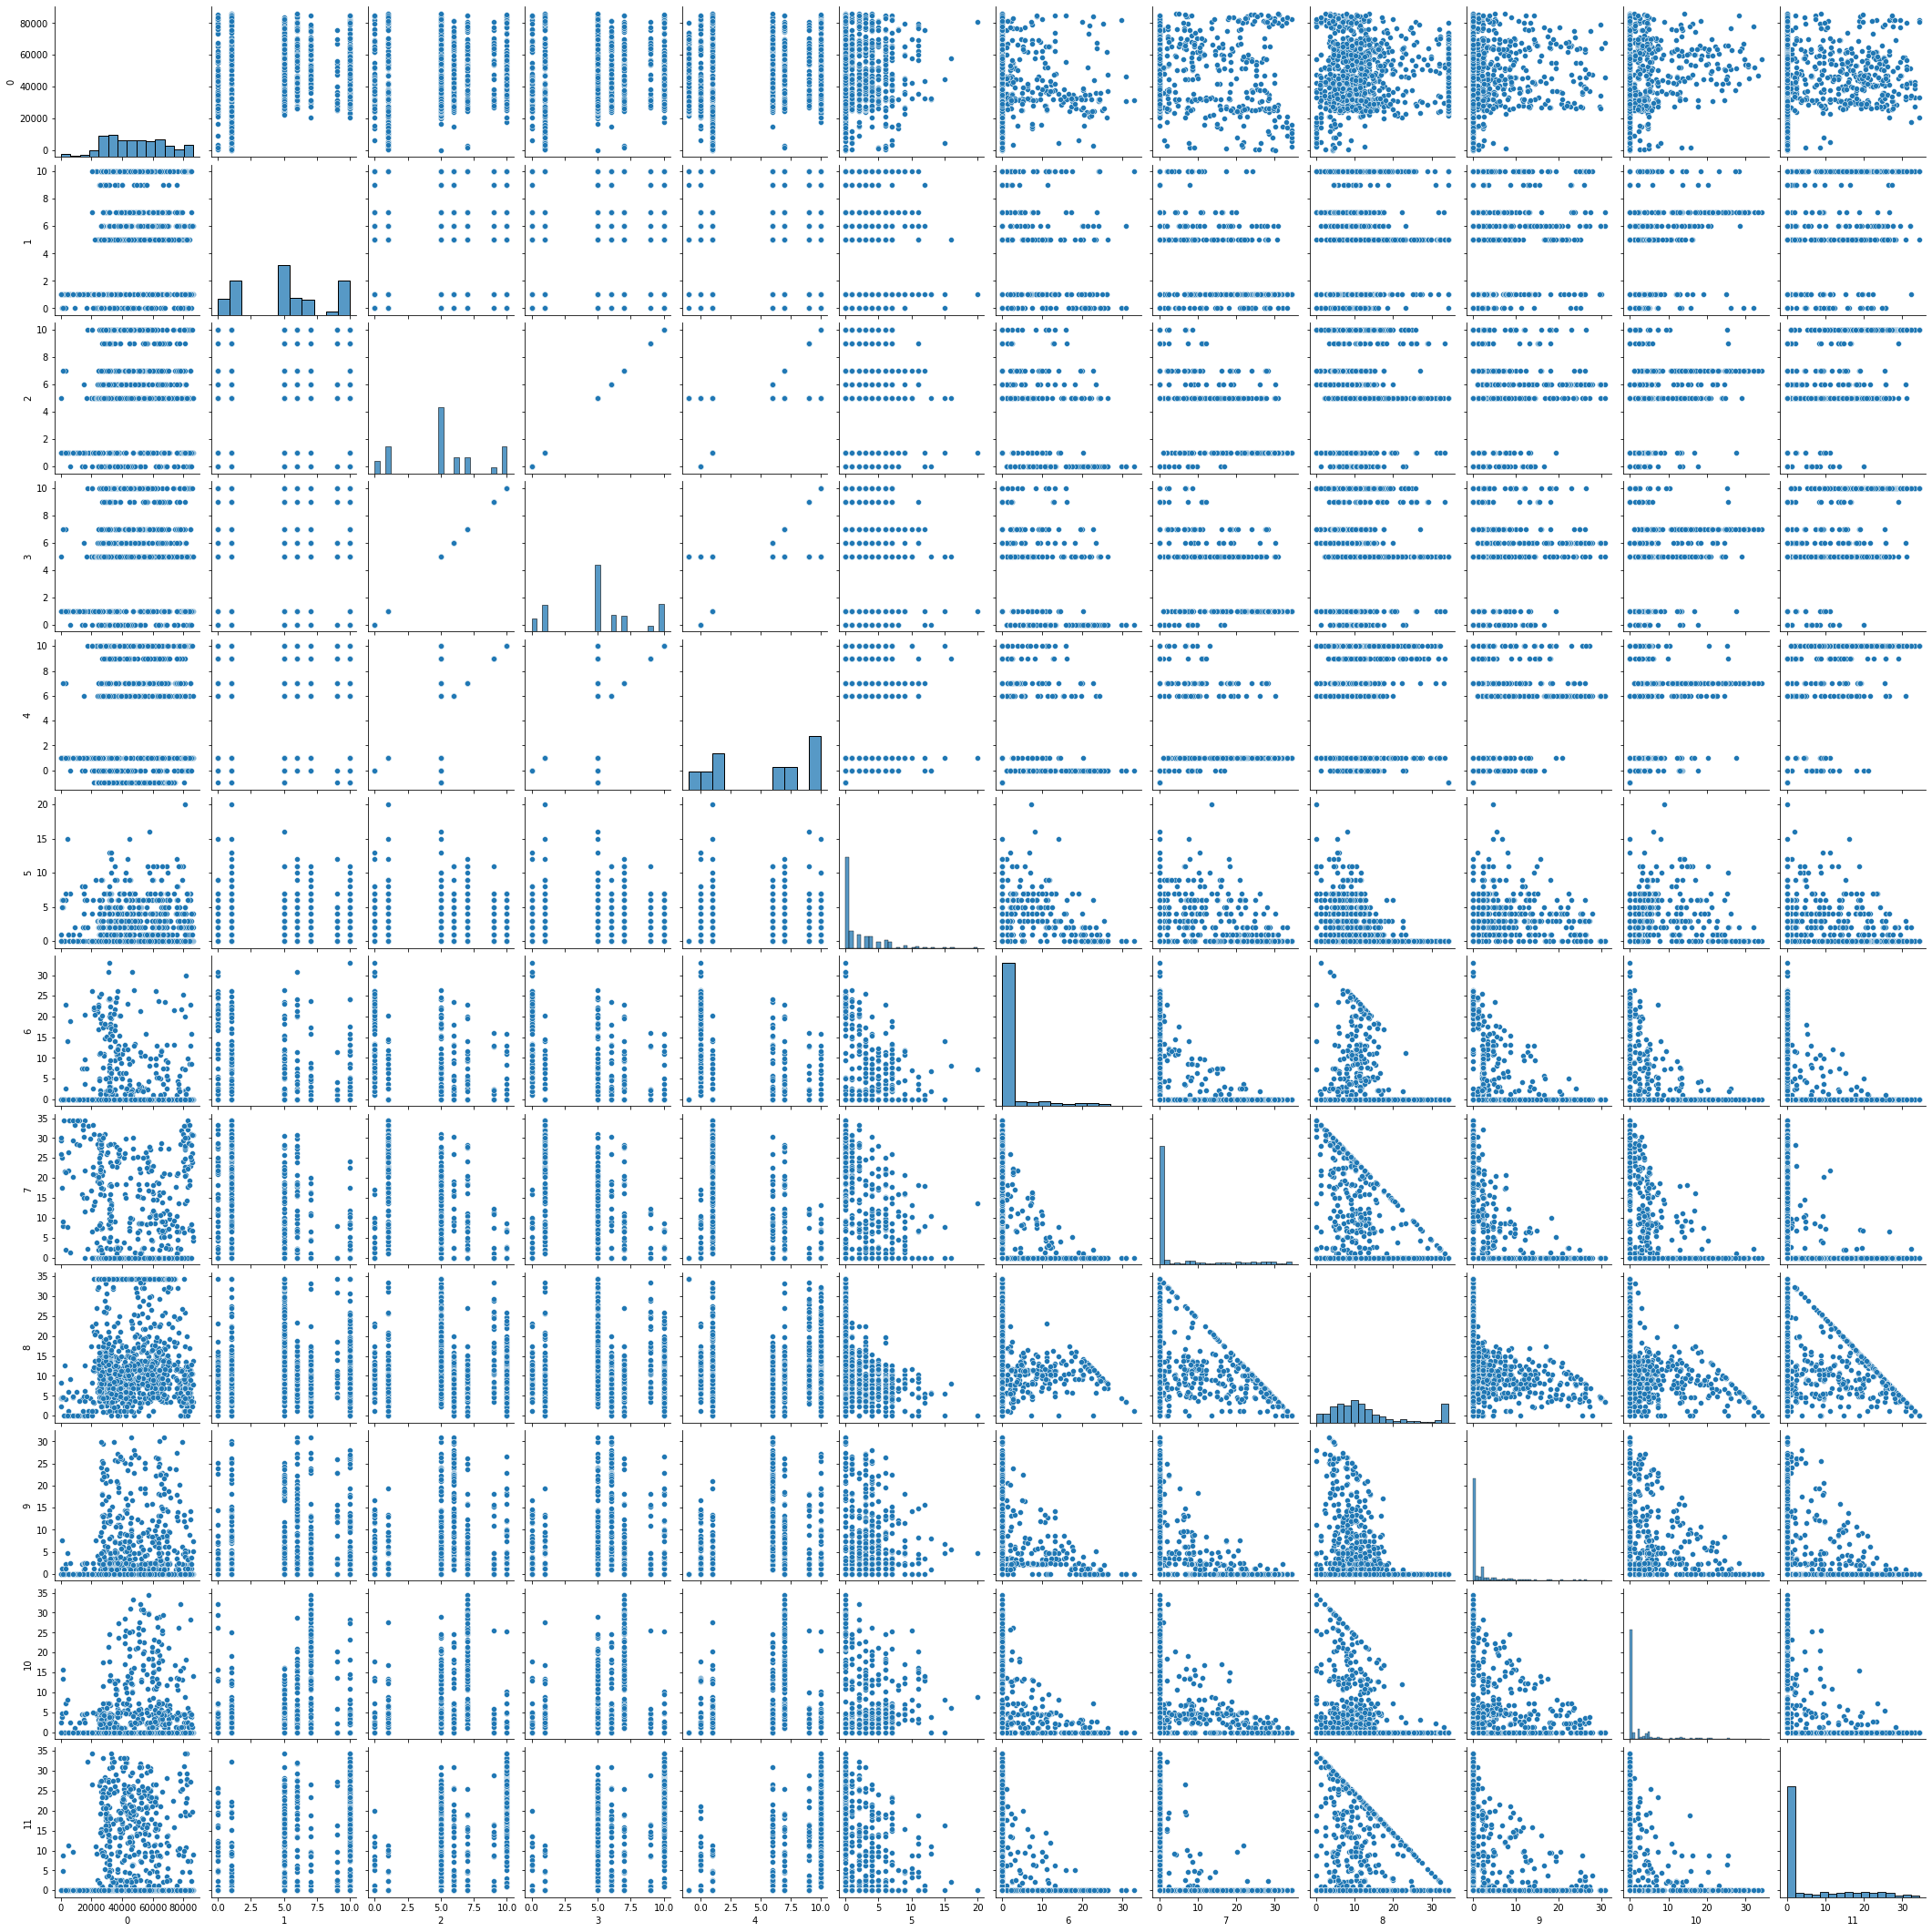

In [ ]:
sns.pairplot(pd.DataFrame(dataset_values).sample(1000))

In [ ]:
scaler = StandardScaler()
dataset_values = scaler.fit_transform(dataset_values)

In [ ]:
yy = dataset['activity'].values

In [ ]:
temp = yy[0]
n = 0
m = 0
res = 0
for i in yy:
  m += 1
  if temp != i:
    temp = i
    n += 1
    res += m
    m = 0
res / n

23.03159826930641

In [ ]:
d = deque(maxlen=15)
X = []
y = []
for i in range(len(dataset_values)):
  row = dataset_values[i]
  d.append([j for j in row])  
  if len(d) == 15:
    X.append([j for j in d])
    y.append(yy[i])



In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(351310, 15, 12)

In [ ]:
np.unique(y, return_counts=True)

(array(['Bathe', 'Bed_Toilet_Transition', 'Cook', 'Cook_Breakfast',
        'Cook_Dinner', 'Cook_Lunch', 'Dress', 'Drink', 'Eat',
        'Eat_Breakfast', 'Eat_Dinner', 'Eat_Lunch', 'Enter_Home',
        'Entertain_Guests', 'Evening_Meds', 'Groom', 'Leave_Home',
        'Morning_Meds', 'Other_Activity', 'Personal_Hygiene', 'Phone',
        'Read', 'Relax', 'Sleep', 'Step_Out', 'Toilet',
        'Wash_Breakfast_Dishes', 'Wash_Dinner_Dishes', 'Wash_Dishes',
        'Wash_Lunch_Dishes', 'Watch_TV', 'Work', 'Work_At_Desk',
        'Work_At_Table', 'Work_On_Computer'], dtype='<U21'),
 array([  1268,    987,    544,   2480,   4190,   1894,  11783,   3664,
           372,   3100,    694,   1613,   1722,  75414,    920,   3289,
          2072,    939, 112806,  10163,    521,  13583,   1208,  16542,
           632,   6489,    894,   1022,   1597,    511,   9625,    926,
           849,   1733,  55264]))

In [ ]:
y = pd.get_dummies(y).values

In [ ]:
y.shape

(351310, 35)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def print_reports(y_pred, y_true):
  print('classification report')
  print()
  print(classification_report(y_true.argmax(axis=1), y_pred))
  print()
  print('confusion matrix')
  print()
  s = ' '.join(list(map(lambda x: f'{x:5d}', list(range(35)))))
  print(' ' * 3, end='')
  print(s)
  print('-' * (len(s) + 3))

  for i, row in enumerate(confusion_matrix(y_true.argmax(axis=1), y_pred)):
    print(f'{i:3d}', end='')
    s = ' '.join(list(map(lambda x: f'{x:5d}', row)))
    print(s)

In [ ]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Dropout, Input, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [ ]:
model = Sequential([
                    LSTM(300,  input_shape=(X_train.shape[1:])),
                    Dense(500, 'tanh'),
                    Dense(200, 'tanh'),
                    Dense(35, 'softmax', )
])

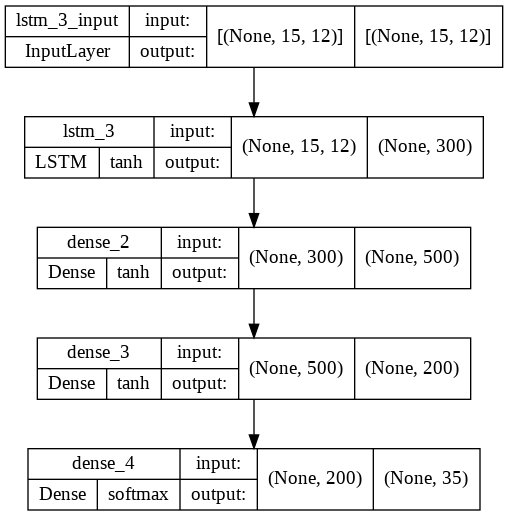

In [ ]:
plot_model(model, show_shapes=True, show_layer_activations=True)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 300)               375600    
                                                                 
 dense_3 (Dense)             (None, 500)               150500    
                                                                 
 dense_4 (Dense)             (None, 200)               100200    
                                                                 
 dense_5 (Dense)             (None, 35)                7035      
                                                                 
Total params: 633,335
Trainable params: 633,335
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mchp = ModelCheckpoint('drive/MyDrive/casas-dataset-extracted/csh117/model.h5', save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=500, validation_data=(X_test, y_test), callbacks=[mchp])

Epoch 1/20
563/563 [==============================] - 19s 27ms/step - loss: 0.9900 - accuracy: 0.6676 - val_loss: 0.8116 - val_accuracy: 0.7154
Epoch 2/20
563/563 [==============================] - 14s 25ms/step - loss: 0.7694 - accuracy: 0.7242 - val_loss: 0.7506 - val_accuracy: 0.7268
Epoch 3/20
563/563 [==============================] - 14s 26ms/step - loss: 0.6824 - accuracy: 0.7516 - val_loss: 0.6513 - val_accuracy: 0.7640
Epoch 4/20
563/563 [==============================] - 14s 25ms/step - loss: 0.6111 - accuracy: 0.7768 - val_loss: 0.5931 - val_accuracy: 0.7803
Epoch 5/20
563/563 [==============================] - 15s 26ms/step - loss: 0.5462 - accuracy: 0.7990 - val_loss: 0.5324 - val_accuracy: 0.8064
Epoch 6/20
563/563 [==============================] - 14s 26ms/step - loss: 0.4911 - accuracy: 0.8188 - val_loss: 0.4992 - val_accuracy: 0.8175
Epoch 7/20
563/563 [==============================] - 15s 26ms/step - loss: 0.4455 - accuracy: 0.8356 - val_loss: 0.4571 - val_accuracy:

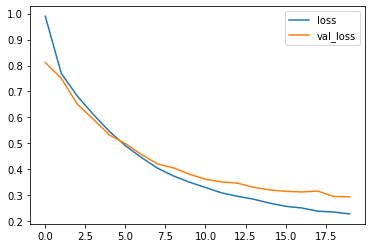

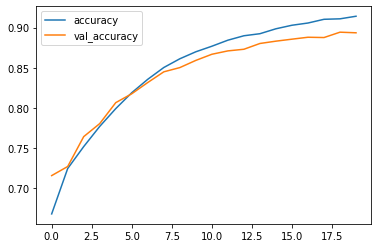

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
model = load_model('drive/MyDrive/casas-dataset-extracted/csh117/model.h5')

In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)

In [ ]:
print_reports(y_pred, y_test)

classification report

              precision    recall  f1-score   support

           0       0.92      0.55      0.69       257
           1       0.94      0.86      0.90       221
           2       0.98      0.88      0.93       125
           3       0.93      0.92      0.92       460
           4       0.93      0.92      0.93       797
           5       0.93      0.96      0.95       389
           6       0.79      0.82      0.81      2402
           7       0.90      0.88      0.89       759
           8       0.94      0.73      0.82        67
           9       0.86      0.65      0.74       600
          10       0.92      0.77      0.83       132
          11       0.84      0.64      0.73       303
          12       0.88      0.81      0.84       333
          13       0.97      0.97      0.97     15256
          14       0.91      0.79      0.85       177
          15       0.81      0.78      0.80       648
          16       0.93      0.88      0.90       388
    

In [ ]:
model2 = Sequential([
                    Conv1D(32, 3, input_shape=(X_train.shape[1:])), 
                    Conv1D(128, 3),
                    Dropout(0.2),
                    LSTM(300  ),
                    Dense(500, 'tanh'),
                    Dropout(0.2),
                    Dense(200, 'tanh'),
                    Dropout(0.2),
                    Dense(35, 'softmax' )
])

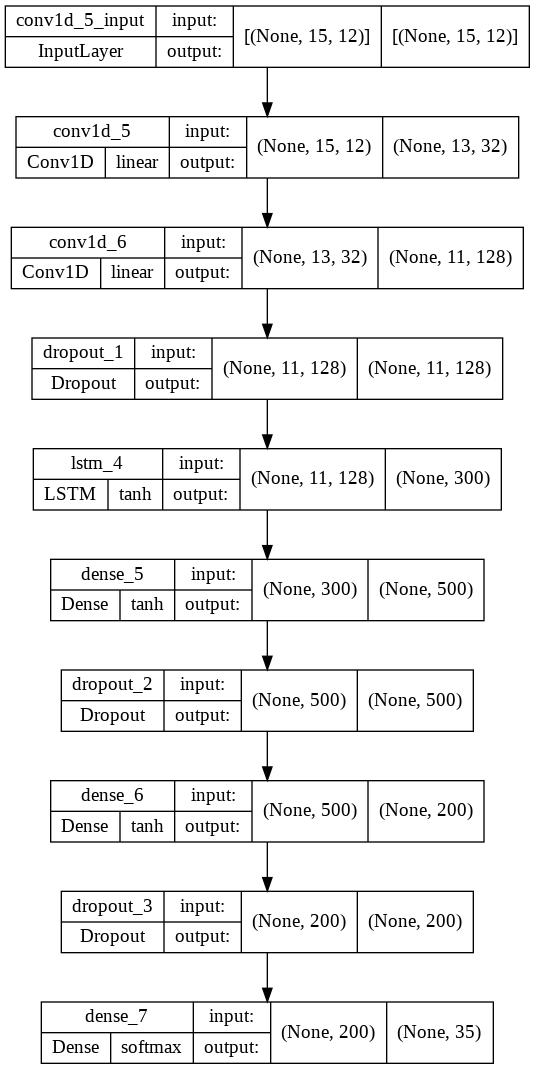

In [ ]:
plot_model(model2, show_shapes=True, show_layer_activations=True)

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 13, 32)            1184      
                                                                 
 conv1d_5 (Conv1D)           (None, 11, 128)           12416     
                                                                 
 dropout_6 (Dropout)         (None, 11, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 300)               514800    
                                                                 
 dense_12 (Dense)            (None, 500)               150500    
                                                                 
 dropout_7 (Dropout)         (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 200)              

In [ ]:
model2.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mchp2 = ModelCheckpoint('drive/MyDrive/casas-dataset-extracted/csh117/model2.h5', save_best_only=True)

In [ ]:
history = model2.fit(X_train, y_train, epochs=70, batch_size=500, validation_data=(X_test, y_test), callbacks=[mchp2])

Epoch 1/70
563/563 [==============================] - 24s 27ms/step - loss: 1.0289 - accuracy: 0.6567 - val_loss: 0.8168 - val_accuracy: 0.7126
Epoch 2/70
563/563 [==============================] - 14s 26ms/step - loss: 0.8092 - accuracy: 0.7128 - val_loss: 0.7190 - val_accuracy: 0.7427
Epoch 3/70
563/563 [==============================] - 15s 26ms/step - loss: 0.7272 - accuracy: 0.7379 - val_loss: 0.6574 - val_accuracy: 0.7633
Epoch 4/70
563/563 [==============================] - 15s 26ms/step - loss: 0.6652 - accuracy: 0.7591 - val_loss: 0.6064 - val_accuracy: 0.7779
Epoch 5/70
563/563 [==============================] - 14s 26ms/step - loss: 0.6135 - accuracy: 0.7769 - val_loss: 0.5669 - val_accuracy: 0.7929
Epoch 6/70
563/563 [==============================] - 14s 26ms/step - loss: 0.5704 - accuracy: 0.7926 - val_loss: 0.5334 - val_accuracy: 0.8053
Epoch 7/70
563/563 [==============================] - 15s 26ms/step - loss: 0.5365 - accuracy: 0.8038 - val_loss: 0.4968 - val_accuracy:

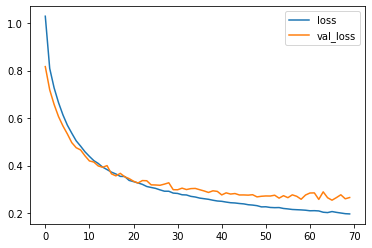

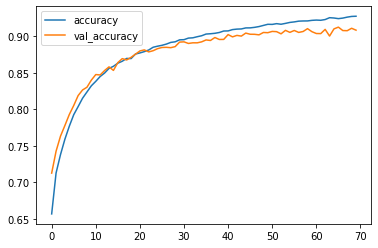

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
model2 = load_model('drive/MyDrive/casas-dataset-extracted/csh117/model2.h5')

In [ ]:
y_pred = model2.predict(X_test).argmax(axis=1)

In [ ]:
print_reports(y_pred, y_test)

classification report

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       257
           1       0.87      0.96      0.91       221
           2       0.96      0.91      0.93       125
           3       0.94      0.98      0.96       460
           4       0.92      0.98      0.95       797
           5       0.95      0.99      0.97       389
           6       0.84      0.91      0.88      2402
           7       0.94      0.92      0.93       759
           8       1.00      0.87      0.93        67
           9       0.85      0.81      0.83       600
          10       0.91      0.88      0.90       132
          11       0.91      0.75      0.82       303
          12       0.89      0.89      0.89       333
          13       0.99      0.97      0.98     15256
          14       0.92      0.89      0.91       177
          15       0.87      0.91      0.89       648
          16       0.95      0.94      0.95       388
    

In [ ]:
inp3 = Input(shape=(X_train.shape[1:]))
conv31 = Conv1D(32, 5, padding='same')(inp3)
conv32 = Conv1D(64, 3, padding='same')(conv31)
conv33 = Conv1D(32, 3, padding='same')(inp3)
conv34 = Conv1D(32, 3, padding='same')(conv31)
conv35 = Conv1D(32, 3, padding='same')(conv32)
conc31 = concatenate([conv31, conv33, conv34, conv35])
lstm31 = LSTM(120)(conc31)
lstm32 = LSTM(120)(conv33)
lstm33 = LSTM(120)(conv35)
conc32 = concatenate([lstm31, lstm32, lstm33])
drop32 = Dropout(0.2)(conc32)
dense31 = Dense(700, 'tanh')(drop32)
out3 = Dense(35, 'softmax')(dense31)

In [ ]:
model3 = Model(inputs=inp3, outputs=out3)

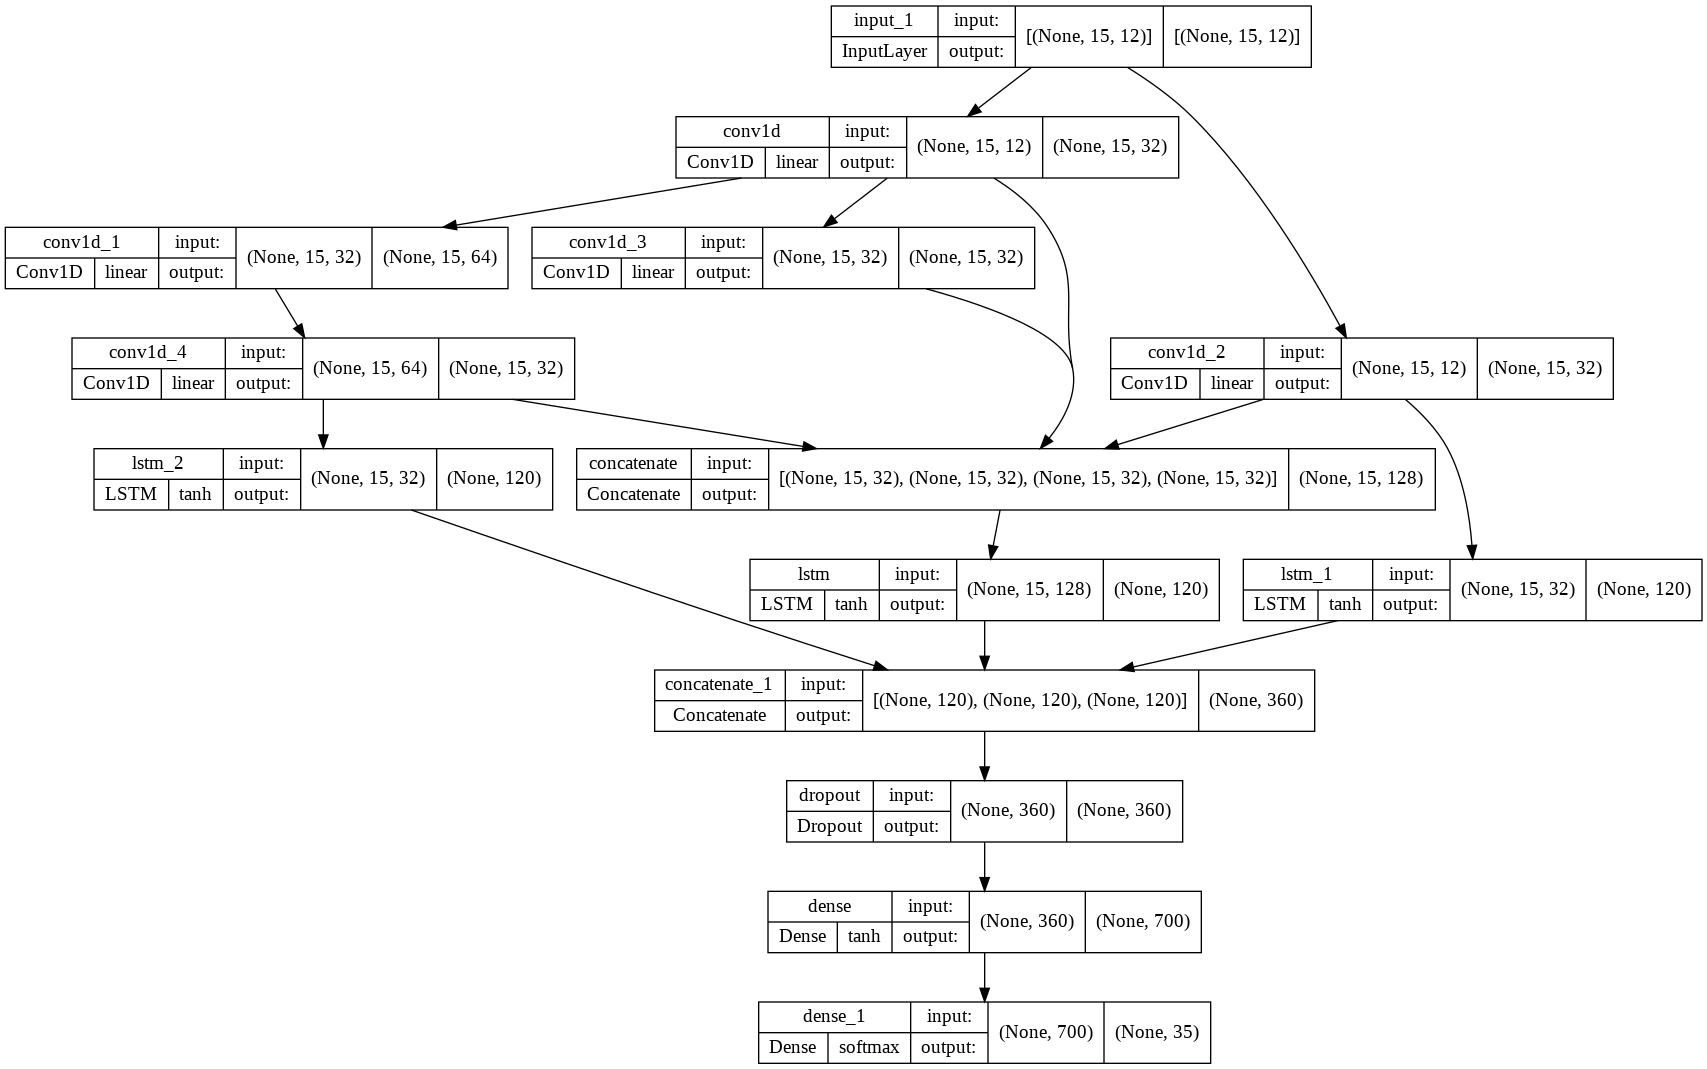

In [ ]:
plot_model(model3, show_shapes=True, show_layer_activations=True)

In [ ]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 15, 12)]     0           []                               
                                                                                                  
 conv1d_10 (Conv1D)             (None, 15, 32)       1952        ['input_3[0][0]']                
                                                                                                  
 conv1d_11 (Conv1D)             (None, 15, 64)       6208        ['conv1d_10[0][0]']              
                                                                                                  
 conv1d_12 (Conv1D)             (None, 15, 32)       1184        ['input_3[0][0]']                
                                                                                            

In [ ]:
model3.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mchp3 = ModelCheckpoint('drive/MyDrive/casas-dataset-extracted/csh117/model3.h5', save_best_only=True)

In [ ]:
rlr3 = ReduceLROnPlateau(patience=5)

In [ ]:
history = model3.fit(X_train, y_train, epochs=50, batch_size=500, validation_data=(X_test, y_test), callbacks=[mchp3, rlr3])

Epoch 1/50
563/563 [==============================] - 89s 40ms/step - loss: 0.9868 - accuracy: 0.6675 - val_loss: 0.8459 - val_accuracy: 0.6981 - lr: 0.0010
Epoch 2/50
563/563 [==============================] - 21s 37ms/step - loss: 0.7915 - accuracy: 0.7177 - val_loss: 0.7324 - val_accuracy: 0.7316 - lr: 0.0010
Epoch 3/50
563/563 [==============================] - 22s 39ms/step - loss: 0.7185 - accuracy: 0.7394 - val_loss: 0.6980 - val_accuracy: 0.7463 - lr: 0.0010
Epoch 4/50
563/563 [==============================] - 21s 38ms/step - loss: 0.6636 - accuracy: 0.7578 - val_loss: 0.6376 - val_accuracy: 0.7641 - lr: 0.0010
Epoch 5/50
563/563 [==============================] - 22s 39ms/step - loss: 0.6195 - accuracy: 0.7727 - val_loss: 0.5989 - val_accuracy: 0.7774 - lr: 0.0010
Epoch 6/50
563/563 [==============================] - 21s 37ms/step - loss: 0.5749 - accuracy: 0.7871 - val_loss: 0.5540 - val_accuracy: 0.7939 - lr: 0.0010
Epoch 7/50
563/563 [==============================] - 21s 

In [ ]:
history2 = model3.fit(X_train, y_train, epochs=15, batch_size=500, validation_data=(X_test, y_test), callbacks=[mchp3, rlr3])

Epoch 1/15
563/563 [==============================] - 22s 39ms/step - loss: 0.1192 - accuracy: 0.9566 - val_loss: 0.1955 - val_accuracy: 0.9336 - lr: 1.0000e-04
Epoch 2/15
563/563 [==============================] - 21s 37ms/step - loss: 0.1134 - accuracy: 0.9589 - val_loss: 0.1926 - val_accuracy: 0.9348 - lr: 1.0000e-04
Epoch 3/15
563/563 [==============================] - 21s 37ms/step - loss: 0.1103 - accuracy: 0.9596 - val_loss: 0.1911 - val_accuracy: 0.9356 - lr: 1.0000e-04
Epoch 4/15
563/563 [==============================] - 22s 39ms/step - loss: 0.1077 - accuracy: 0.9608 - val_loss: 0.1904 - val_accuracy: 0.9360 - lr: 1.0000e-04
Epoch 5/15
563/563 [==============================] - 21s 37ms/step - loss: 0.1053 - accuracy: 0.9615 - val_loss: 0.1894 - val_accuracy: 0.9366 - lr: 1.0000e-04
Epoch 6/15
563/563 [==============================] - 21s 37ms/step - loss: 0.1037 - accuracy: 0.9620 - val_loss: 0.1892 - val_accuracy: 0.9369 - lr: 1.0000e-04
Epoch 7/15
563/563 [==============

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=15, batch_size=500, validation_data=(X_test, y_test), callbacks=[mchp3, rlr3])

Epoch 1/15
563/563 [==============================] - 22s 40ms/step - loss: 0.0908 - accuracy: 0.9666 - val_loss: 0.1874 - val_accuracy: 0.9400 - lr: 1.0000e-04
Epoch 2/15
563/563 [==============================] - 20s 36ms/step - loss: 0.0894 - accuracy: 0.9673 - val_loss: 0.1871 - val_accuracy: 0.9405 - lr: 1.0000e-04
Epoch 3/15
563/563 [==============================] - 21s 37ms/step - loss: 0.0885 - accuracy: 0.9675 - val_loss: 0.1870 - val_accuracy: 0.9409 - lr: 1.0000e-04
Epoch 4/15
563/563 [==============================] - 21s 38ms/step - loss: 0.0882 - accuracy: 0.9676 - val_loss: 0.1880 - val_accuracy: 0.9404 - lr: 1.0000e-04
Epoch 5/15
563/563 [==============================] - 22s 38ms/step - loss: 0.0867 - accuracy: 0.9682 - val_loss: 0.1879 - val_accuracy: 0.9408 - lr: 1.0000e-04
Epoch 6/15
563/563 [==============================] - 21s 38ms/step - loss: 0.0859 - accuracy: 0.9685 - val_loss: 0.1871 - val_accuracy: 0.9408 - lr: 1.0000e-04
Epoch 7/15
563/563 [==============

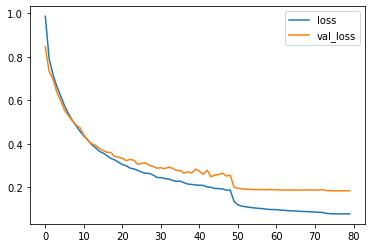

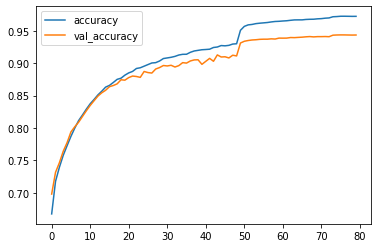

In [ ]:
loss = history.history['loss'] + history2.history['loss'] + history3.history['loss']
val_loss = history.history['val_loss'] + history2.history['val_loss'] + history3.history['val_loss']
accuracy = history.history['accuracy'] + history2.history['accuracy'] + history3.history['accuracy']
val_accuracy = history.history['val_accuracy'] + history2.history['val_accuracy'] + history3.history['val_accuracy']

plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend(loc='best')
plt.show()
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
model3 = load_model('drive/MyDrive/casas-dataset-extracted/csh117/model3.h5')

In [ ]:
y_pred = model3.predict(X_test).argmax(axis=1)

In [ ]:
print_reports(y_pred, y_test)

classification report

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       232
           1       0.86      0.87      0.87       180
           2       0.99      0.99      0.99       109
           3       0.93      0.96      0.94       494
           4       0.95      0.95      0.95       849
           5       0.95      0.93      0.94       369
           6       0.90      0.92      0.91      2260
           7       0.88      0.90      0.89       707
           8       0.93      0.96      0.94        67
           9       0.91      0.85      0.88       667
          10       0.92      0.89      0.90       138
          11       0.90      0.89      0.89       320
          12       0.86      0.89      0.87       332
          13       0.99      0.99      0.99     15300
          14       0.86      0.88      0.87       163
          15       0.91      0.90      0.90       682
          16       0.88      0.89      0.89       417
    